<a href="https://colab.research.google.com/github/robins645/ML_Project/blob/main/marital_statuprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/rashakil-ds/Linear-Regression-with-Python/refs/heads/main/marital%20status.csv')

In [6]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,1.0
8,19,0.0
9,22,0.0


In [7]:
df.status.max()

1.0

In [8]:
df.status.info()

<class 'pandas.core.series.Series'>
RangeIndex: 18 entries, 0 to 17
Series name: status
Non-Null Count  Dtype  
--------------  -----  
17 non-null     float64
dtypes: float64(1)
memory usage: 276.0 bytes


In [9]:
df.status.count()

17

In [11]:
df = df.dropna()

In [12]:
X = df[['age']]
y = df['status']

In [13]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,1.0
8,19,0.0
9,22,0.0


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [21]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



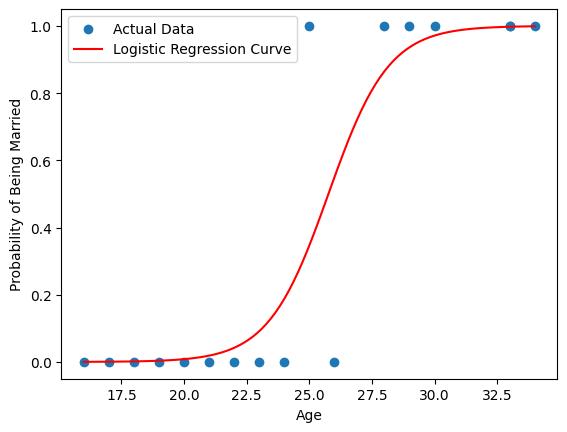

In [27]:
age_range = np.linspace(df['age'].min(), df['age'].max(), 100).reshape(-1, 1)
pred_probs = model.predict_proba(age_range)[:, 1]

plt.scatter(df['age'], df['status'], label='Actual Data')
plt.plot(age_range, pred_probs, color='red', label='Logistic Regression Curve')
plt.xlabel('Age')
plt.ylabel('Probability of Being Married')
plt.legend()
plt.show()


In [28]:
# Compute sigmoid function values (probabilities) for test data
y_prob = model.predict_proba(X_test)[:, 1]
print("Sigmoid Function Values (Probabilities) for Test Data:\n", y_prob)

Sigmoid Function Values (Probabilities) for Test Data:
 [0.0187088  0.99755894 0.99755894 0.00157321]


In [29]:
y_pred

array([0., 1., 1., 0.])